In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from imblearn.datasets import make_imbalance

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings('ignore')

**Import dataset and perform data preparation**

In [ ]:
list_files = np.load('octmnist.npz')
for name in list_files:
  print(name)
  print(np.shape(list_files[name]))

train_images
(97477, 28, 28)
val_images
(10832, 28, 28)
test_images
(1000, 28, 28)
train_labels
(97477, 1)
val_labels
(10832, 1)
test_labels
(1000, 1)


In [ ]:
train_images = list_files['train_images']
train_labels = list_files['train_labels']

test_images = list_files['test_images']
test_labels = list_files['test_labels']

val_images = list_files['val_images']
val_labels = list_files['val_labels']

In [ ]:
x = np.concatenate((train_images, test_images, val_images), axis= 0)
y = np.concatenate((train_labels, test_labels, val_labels), axis = 0)

In [ ]:
x_re = x.reshape(109309, -1)
y_re = y.reshape(109309, -1)

In [ ]:
x_df = pd.DataFrame(x_re)

3    51390
0    37455
1    11598
2     8866
Name: Class, dtype: int64


<Axes: title={'center': 'Data Distribution'}>

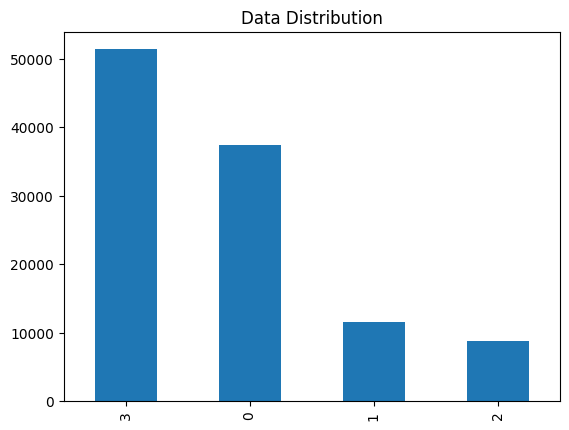

In [ ]:
y_df = pd.DataFrame(y_re, columns = ['Class'])
print(y_df['Class'].value_counts())
y_df['Class'].value_counts().plot(kind='bar', title = 'Data Distribution')

In [ ]:
x_red, y_red = make_imbalance(x_df, y_df, sampling_strategy= {0: 8866, 1: 8866, 2: 8866, 3: 8866}, random_state=35)


In [ ]:
np.shape(x_red)

(35464, 784)

In [ ]:
np.shape(y_red)

(35464, 1)

<Axes: title={'center': 'Data Distribution'}>

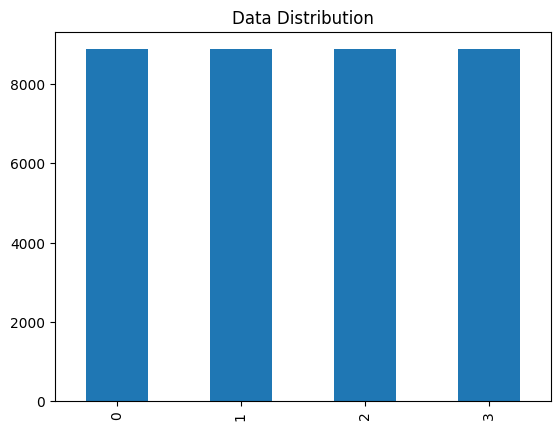

In [ ]:
y_red['Class'].value_counts().plot(kind='bar', title = 'Data Distribution')

In [ ]:
x_red = x_red.to_numpy()

In [ ]:
y_red = y_red.to_numpy()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit as strata
split_info = strata(n_splits =1, test_size = 1000, random_state = 35)

for train_index, test_index in split_info.split(x_red, y_red):
  X_train = x_red[train_index, :]
  x_test = x_red[test_index, :]
  Y_train = y_red[train_index, :]
  y_test = y_red[test_index, :]

In [ ]:
split_info_2 = strata(n_splits =1, test_size = .2, random_state = 35)

for train_index, test_index in split_info_2.split(X_train, Y_train):
  x_train = X_train[train_index, :]
  x_val = X_train[test_index, :]
  y_train = Y_train[train_index, :]
  y_val = Y_train[test_index, :]

In [ ]:
np.shape(x_train)

(27571, 784)

In [ ]:
np.shape(y_train)

(27571, 1)

In [ ]:
np.shape(x_test)

(1000, 784)

In [ ]:
np.shape(y_test)

(1000, 1)

In [ ]:
np.shape(x_val)

(6893, 784)

In [ ]:
np.shape(y_val)

(6893, 1)

In [ ]:
x_train = (255 - x_train).astype(np.int64)

In [ ]:
x_test = (255 - x_test).astype(np.int64)

In [ ]:
x_val = (255 - x_val).astype(np.int64)

In [ ]:
x_train = x_train / 255.
x_test = x_test / 255.
x_val = x_val / 255.

**PART 1: Two+ Classifier Models**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

*Initial tests*

K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_val)

knn_acc = accuracy_score(y_val, knn_pred)
knn_prec = precision_score(y_val, knn_pred, average= 'macro')

print('Accuracy of KNN: %1.4f' % knn_acc)
print('Precision of KNN: %1.4f' % knn_prec)

Accuracy of KNN: 0.4866
Precision of KNN: 0.5068


Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 5)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_val)

rf_acc = accuracy_score(y_val, rf_pred)
rf_prec = precision_score(y_val, rf_pred, average = 'macro')

print('Accuracy of RF: %1.4f' % rf_acc)
print('Precision of RF: %1.4f' % rf_prec)

Accuracy of RF: 0.4798
Precision of RF: 0.4824


Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_val)

dt_acc = accuracy_score(y_val, dt_pred)
dt_prec = precision_score(y_val, dt_pred, average = 'macro')

print('Accuracy of DT: %1.4f' % dt_acc)
print('Precision of DT: %1.4f' % dt_prec)

Accuracy of DT: 0.4928
Precision of DT: 0.4935


Support Vector Machine

In [ ]:
svm = LinearSVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_val)

svm_acc = accuracy_score(y_val, svm_pred)
svm_prec = precision_score(y_val, svm_pred, average = 'macro')

print('Accuracy of SVM: %1.4f' % svm_acc)
print('Precision of SVM: %1.4f' % svm_prec)

Accuracy of SVM: 0.3698
Precision of SVM: 0.5144


Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_val)

lr_acc = accuracy_score(y_val, lr_pred)
lr_prec = precision_score(y_val, lr_pred, average = 'macro')

print('Accuracy of LR: %1.4f' % lr_acc)
print('Precision of LR: %1.4f' % lr_prec)

Accuracy of LR: 0.4190
Precision of LR: 0.4209


Naive Bayesian

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_val)

nb_acc = accuracy_score(y_val, nb_pred)
nb_prec = precision_score(y_val, nb_pred, average = 'macro')

print('Accuracy of NB: %1.4f' % nb_acc)
print('Precision of NB: %1.4f' % nb_prec)

Accuracy of NB: 0.2941
Precision of NB: 0.2947


The top three individual models when using standard parameters are KNN, SVM, and decision tree. 


Let's test combinations of models. But first, let's set up a PCA which we can combine with other models to see if dimensionality reduction helps performance.

43 out of 784 components account for 95% of variance
53 out of 784 components account for 96% of variance
67 out of 784 components account for 97% of variance
90 out of 784 components account for 98% of variance
136 out of 784 components account for 99% of variance


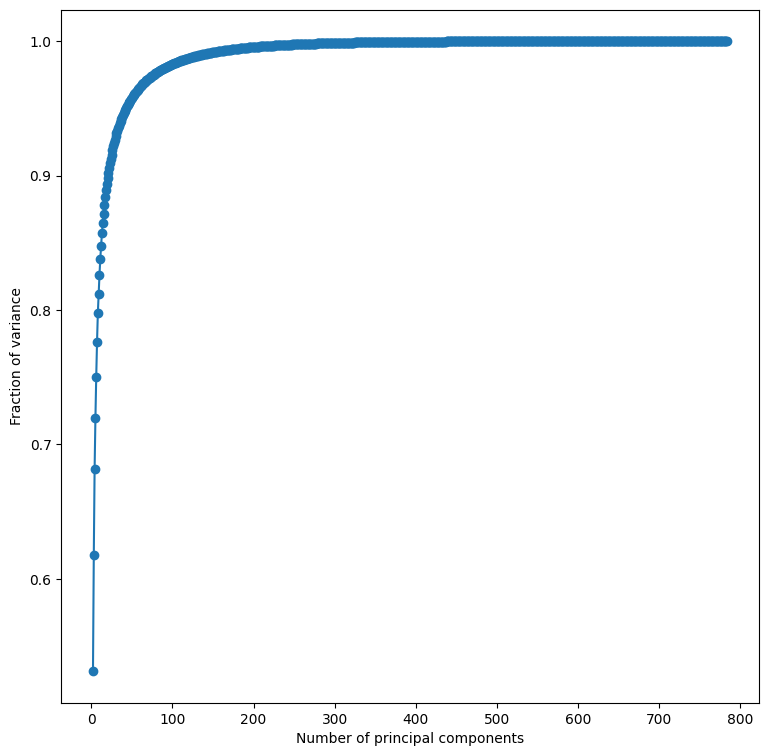

In [ ]:
from sklearn.decomposition import PCA

pcaval = PCA()
pcaval.fit(x_train)


## Compute how much variance is explained by each component
CUMSUM_gold = np.cumsum(pcaval.explained_variance_ratio_)
for perc in range(95,100):
    dmax = np.argmax(CUMSUM_gold >= (perc/100)) + 1
    print('%d out of %d components account for %d%% of variance' % (dmax, np.size(x_train,axis=1), perc))



## Plot the results
plt.figure(figsize=(9,9))
plt.xlabel('Number of principal components')
plt.ylabel('Fraction of variance')
plt.plot(range(2,len(CUMSUM_gold)+1), CUMSUM_gold[1:], marker='o')
plt.show()

In [ ]:
pca_99 = PCA(n_components = 136)

x_train_pca = pca_99.fit_transform(x_train)
x_val_pca = pca_99.transform(x_val)

In [ ]:
print(np.shape(x_train_pca))

(27571, 136)


We can now build ensembles and train them with and without a PCA.

Prepare X_train and X_val for feature selection. First do Random Forest feature selection.

In [ ]:
rf_features = RandomForestClassifier(
    n_estimators = 100,
    criterion = 'entropy',
    max_depth = 5
)

selected_features = SelectFromModel(rf_features, threshold = 'median')

x_train_rf = selected_features.fit_transform(x_train, y_train)


In [ ]:
print(np.shape(x_train_rf))

(27571, 392)


In [ ]:
x_val_rf = selected_features.transform(x_val)
print(np.shape(x_val_rf))

(6893, 392)


Next do logistic regression feature selection.

In [ ]:
lr_features = LogisticRegression()

selected_features_lr = SelectFromModel(lr_features, threshold = 'median')

x_train_lr = selected_features_lr.fit_transform(x_train, y_train)

In [ ]:
print(np.shape(x_train_lr))

(27571, 392)


In [ ]:
x_val_lr = selected_features_lr.transform(x_val)
print(np.shape(x_val_lr))

(6893, 392)


A) Random Forest with SVM

In [ ]:
lin_svc = LinearSVC()

lin_svc.fit(x_train_rf, y_train)
lin_svc_pred = lin_svc.predict(x_val_rf)

lin_svc_acc = accuracy_score(y_val, lin_svc_pred)
lin_svc_prec = precision_score(y_val, lin_svc_pred, average = 'macro')

print('Accuracy of RF + LinSVC: %1.4f' % lin_svc_acc)
print('Precision of RF + LinSVC: %1.4f' % lin_svc_prec)

Accuracy of RF + LinSVC: 0.4802
Precision of RF + LinSVC: 0.4937


B) Logistic regression for feature selection with SVM

In [ ]:
lin_svc_lr = LinearSVC()

lin_svc_lr.fit(x_train_lr, y_train)
lin_svc_lr_pred = lin_svc_lr.predict(x_val_lr)

lin_svc_lr_acc = accuracy_score(y_val, lin_svc_lr_pred)
lin_svc_lr_prec = precision_score(y_val, lin_svc_lr_pred, average = 'macro')

print('Accuracy of LR + LinSVC: %1.4f' % lin_svc_lr_acc)
print('Precision of LR + LinSVC: %1.4f' % lin_svc_lr_prec)

Accuracy of LR + LinSVC: 0.4682
Precision of LR + LinSVC: 0.4735


C) PCA into SVM

In [ ]:
lin_svc_pca = LinearSVC()

lin_svc_pca.fit(x_train_pca, y_train)
lin_svc_pca_pred = lin_svc_pca.predict(x_val_pca)

lin_svc_pca_acc = accuracy_score(y_val, lin_svc_pca_pred)
lin_svc_pca_prec = precision_score(y_val, lin_svc_pca_pred, average = 'macro')

print('Accuracy of PCA + LinSVC: %1.4f' % lin_svc_pca_acc)
print('Precision of PCA + LinSVC: %1.4f' % lin_svc_pca_prec)

Accuracy of PCA + LinSVC: 0.4709
Precision of PCA + LinSVC: 0.4703


D) Logistic regression feature selection into a random forest

In [ ]:
lr_rf = RandomForestClassifier()

lr_rf.fit(x_train_lr, y_train)
lr_rf_pred = lr_rf.predict(x_val_lr)

lr_rf_acc = accuracy_score(y_val, lr_rf_pred)
lr_rf_prec = precision_score(y_val, lr_rf_pred, average = 'macro')

print('Accuracy of LR + RF: %1.4f' % lr_rf_acc)
print('Precision of LR + RF: %1.4f' % lr_rf_prec)

Accuracy of LR + RF: 0.6901
Precision of LR + RF: 0.6909


E) Random forest into a logistic regressor?

In [ ]:
rf_lr = LogisticRegression()

rf_lr.fit(x_train_rf, y_train)
rf_lr_pred = rf_lr.predict(x_val_rf)

rf_lr_acc = accuracy_score(y_val, rf_lr_pred)
rf_lr_prec = precision_score(y_val, rf_lr_pred, average = 'macro')

print('Accuracy of RF + LR: %1.4f' % rf_lr_acc)
print('Precision of RF + LR: %1.4f' % rf_lr_prec)


Accuracy of RF + LR: 0.4226
Precision of RF + LR: 0.4198


F) Logistic regressor feature selection into a KNN

In [ ]:
lr_knn = KNeighborsClassifier()

lr_knn.fit(x_train_lr, y_train)
lr_knn_pred = lr_knn.predict(x_val_lr)

lr_knn_acc = accuracy_score(y_val, lr_knn_pred)
lr_knn_prec = precision_score(y_val, lr_knn_pred, average = 'macro')

print('Accuracy of LR + KNN: %1.4f' % lr_knn_acc)
print('Precision of LR + KNN: %1.4f' % lr_knn_prec)

Accuracy of LR + KNN: 0.5388
Precision of LR + KNN: 0.5596


G) Random forest into a KNN

In [ ]:
rf_knn = KNeighborsClassifier(n_neighbors = 4)

rf_knn.fit(x_train_rf, y_train)
rf_knn_pred = rf_knn.predict(x_val_rf)

rf_knn_acc = accuracy_score(y_val, rf_knn_pred)
rf_knn_prec = precision_score(y_val, rf_knn_pred, average = 'macro')

print('Accuracy of RF + KNN: %1.4f' % rf_knn_acc)
print('Precision of RF + KNN: %1.4f' % rf_knn_prec)

Accuracy of RF + KNN: 0.5420
Precision of RF + KNN: 0.5663


H) Adaboost and Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier(
    max_depth = 5,
    criterion = 'entropy'
)

dt_abc = AdaBoostClassifier(
    dt_clf,
    n_estimators = 50,
    algorithm = 'SAMME.R'
)

dt_abc.fit(x_train, y_train)
dt_abc_pred = dt_abc.predict(x_val)
dt_abc_acc = accuracy_score(y_val, dt_abc_pred)
dt_abc_prec = precision_score(y_val, dt_abc_pred, average = 'macro')

print('Accuracy of AB + DT: %1.4f' % dt_abc_acc)
print('Precision of AB + DT: %1.4f' % dt_abc_prec)

Accuracy of AB + DT: 0.5893
Precision of AB + DT: 0.6037


I) PCA, then AdaBoost for Decision Tree

In [ ]:
dt_abc_pca = AdaBoostClassifier(
    dt_clf,
    n_estimators = 100,
    algorithm = 'SAMME.R'
)

dt_abc_pca.fit(x_train_pca, y_train)
dt_abc_pca_pred = dt_abc_pca.predict(x_val_pca)
dt_abc_pca_acc = accuracy_score(y_val, dt_abc_pca_pred)
dt_abc_pca_prec = precision_score(y_val, dt_abc_pca_pred, average = 'macro')

print('Accuracy of PCA + AB + DT: %1.4f' % dt_abc_pca_acc)
print('Precision of PCA + AB + DT: %1.4f' % dt_abc_pca_prec)

Accuracy of PCA + AB + DT: 0.5300
Precision of PCA + AB + DT: 0.5450


In [ ]:
dt_abc_log = AdaBoostClassifier(
    dt_clf,
    n_estimators = 100,
    algorithm = 'SAMME.R'
)

dt_abc_log.fit(x_train_lr, y_train)
dt_abc_log_pred = dt_abc_log.predict(x_val_lr)
dt_abc_log_acc = accuracy_score(y_val, dt_abc_log_pred)
dt_abc_log_prec = precision_score(y_val, dt_abc_log_pred, average = 'macro')


In [ ]:
print('Accuracy of LR + AB + DT: %1.4f' % dt_abc_log_acc)
print('Precision of LR + AB + DT: %1.4f' % dt_abc_log_prec)

Accuracy of LR + AB + DT: 0.5732
Precision of LR + AB + DT: 0.5953


J) Given how good Logistic Regression and Random Forest performed, let's see how SGD feature selection and random forest perform

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_features = SGDClassifier(loss = 'log_loss')

selected_features_sgd = SelectFromModel(sgd_features, threshold = 'median')

x_train_sgd = selected_features_sgd.fit_transform(x_train, y_train)

x_val_sgd = selected_features_sgd.transform(x_val)

In [ ]:
sgd_rf = RandomForestClassifier()

sgd_rf.fit(x_train_sgd, y_train)
sgd_rf_pred = sgd_rf.predict(x_val_sgd)

sgd_rf_acc = accuracy_score(y_val, sgd_rf_pred)
sgd_rf_prec = precision_score(y_val, sgd_rf_pred, average = 'macro')

print('Accuracy of SGD + RF: %1.4f' % sgd_rf_acc)
print('Precision of SGD + RF: %1.4f' % sgd_rf_prec)

Accuracy of SGD + RF: 0.6852
Precision of SGD + RF: 0.6870


K) Let's try one last predictor, using SGD with gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
sgd_gb = GradientBoostingClassifier()

sgd_gb.fit(x_train_sgd, y_train)
sgd_gb_pred = sgd_gb.predict(x_val_sgd)

sgd_gb_acc = accuracy_score(y_val, sgd_gb_pred)
sgd_gb_prec = precision_score(y_val, sgd_gb_pred, average = 'macro')

print('Accuracy of SGD + GB: %1.4f' % sgd_gb_acc)
print('Precision of SGD + GB: %1.4f' % sgd_gb_prec)

Accuracy of SGD + GB: 0.6151
Precision of SGD + GB: 0.6210


**Perform a parameter search and cross validation on top model**

In [ ]:
sgd_rf_acctable = pd.DataFrame(columns = [])


C = [0.001, 0.01, 0.1, 1]
solver = ['sag', 'lbfgs', 'newton-cg']
threshold = ['1.25*median', 'median']
criterion = ['gini', 'entropy', 'log_loss']
n_estimators = [100, 500, 1000, 2000]
max_depth = [2, 5, None]


In [ ]:
lr_rf_parameters = pd.DataFrame(columns = ['acc', 'prec', 'C', 'solver', 'threshold', 'criterion', 'n_est', 'max_depth'])

iteration = 1

for i in range(0, 4):
  for j in range(0, 1):
    for m in range(0, 1):
      for n in range(0, 1):
        for o in range(0, 1):
          for p in range(0, 1):

              lr_model = LogisticRegression(
                  penalty = 'l2',
                  C = C[i],
                  solver = solver[j],
                  warm_start = True,
                  n_jobs = -1,
                  random_state = 30,
                  multi_class = 'ovr'
              )

              select_lr = SelectFromModel(
                  lr_model,
                  threshold = threshold[m]
              )

              select_x_train = select_lr.fit_transform(x_train[:10000], y_train[:10000])
              select_x_val = select_lr.transform(x_val)

              lr_rf_model = RandomForestClassifier()

              lr_rf_model_cv = cross_val_predict(lr_rf_model, select_x_train, y_train[:10000], cv = 3, n_jobs = -1)
              model_acc = accuracy_score(y_train[:10000], lr_rf_model_cv)
              model_prec = precision_score(y_train[:10000], lr_rf_model_cv, average = 'macro')

              lr_rf_parameters = lr_rf_parameters.append({'acc' : model_acc, 
                                                            'prec' : model_prec, 
                                                            'C' : C[i], 
                                                            'solver' : solver[j], 
                                                            'threshold' : threshold[m], 
                                                            'criterion' : criterion[n], 
                                                            'n_est' : n_estimators[o], 
                                                            'max_depth' : max_depth[p]}
                                                            , ignore_index = True)
              print(model_acc, model_prec, iteration)

              iteration += 1

print(lr_rf_parameters)

0.6008 0.6044391318296296 1
0.6019 0.6049988566880602 2
0.6007 0.6042681961005496 3
0.6013 0.6051800570066503 4
      acc      prec      C solver    threshold criterion n_est max_depth
0  0.6008  0.604439  0.001    sag  1.25*median      gini  1000         5
1  0.6019  0.604999  0.010    sag  1.25*median      gini  1000         5
2  0.6007  0.604268  0.100    sag  1.25*median      gini  1000         5
3  0.6013  0.605180  1.000    sag  1.25*median      gini  1000         5


In [ ]:
lr_rf_parameters = pd.DataFrame(columns = ['acc', 'prec', 'solver', 'threshold', 'criterion', 'n_est', 'max_depth'])

iteration = 1

for j in range(0, 3):
  for m in range(0, 2):
    for n in range(0, 1):
      for o in range(0, 1):
        for p in range(0, 1):

            lr_model = LogisticRegression(
                penalty = 'l2',
                C = 0.01,
                solver = solver[j],
                warm_start = True,
                n_jobs = -1,
                random_state = 30,
                multi_class = 'ovr'
            )

            select_lr = SelectFromModel(
                lr_model,
                threshold = threshold[m]
            )

            select_x_train = select_lr.fit_transform(x_train[:10000], y_train[:10000])
            select_x_val = select_lr.transform(x_val)

            lr_rf_model = RandomForestClassifier()

            lr_rf_model_cv = cross_val_predict(lr_rf_model, select_x_train, y_train[:10000], cv = 3, n_jobs = -1)
            model_acc = accuracy_score(y_train[:10000], lr_rf_model_cv)
            model_prec = precision_score(y_train[:10000], lr_rf_model_cv, average = 'macro')

            lr_rf_parameters = lr_rf_parameters.append({'acc' : model_acc, 
                                                          'prec' : model_prec, 
                                                          'C' : C[i], 
                                                          'solver' : solver[j], 
                                                          'threshold' : threshold[m], 
                                                          'criterion' : criterion[n], 
                                                          'n_est' : n_estimators[o], 
                                                          'max_depth' : max_depth[p]}
                                                          , ignore_index = True)
            print(model_acc, model_prec, iteration)

            iteration += 1

print(lr_rf_parameters)

0.5986 0.6022797348433889 1
0.5997 0.6037772685351843 2
0.5948 0.5974650555356137 3
0.6022 0.605230832726511 4
0.6008 0.6039005716452522 5
0.6041 0.6079453008691857 6
      acc      prec     solver    threshold criterion n_est max_depth    C
0  0.5986  0.602280        sag  1.25*median      gini  1000         5  1.0
1  0.5997  0.603777        sag       median      gini  1000         5  1.0
2  0.5948  0.597465      lbfgs  1.25*median      gini  1000         5  1.0
3  0.6022  0.605231      lbfgs       median      gini  1000         5  1.0
4  0.6008  0.603901  newton-cg  1.25*median      gini  1000         5  1.0
5  0.6041  0.607945  newton-cg       median      gini  1000         5  1.0


In [ ]:
lr_rf_parameters = pd.DataFrame(columns = ['acc', 'prec', 'solver', 'threshold', 'criterion', 'n_est', 'max_depth'])

iteration = 1

for n in range(0, 3):

    lr_model = LogisticRegression(
        penalty = 'l2',
        C = 0.01,
        solver = 'newton-cg',
        warm_start = True,
        n_jobs = -1,
        random_state = 30,
        multi_class = 'ovr'
    )

    select_lr = SelectFromModel(
        lr_model,
        threshold = 'median'
    )

    select_x_train = select_lr.fit_transform(x_train[:10000], y_train[:10000])
    select_x_val = select_lr.transform(x_val)

    lr_rf_model = RandomForestClassifier(
              criterion = criterion[n]
          )

    lr_rf_model_cv = cross_val_predict(lr_rf_model, select_x_train, y_train[:10000], cv = 3, n_jobs = -1)
    model_acc = accuracy_score(y_train[:10000], lr_rf_model_cv)
    model_prec = precision_score(y_train[:10000], lr_rf_model_cv, average = 'macro')

    lr_rf_parameters = lr_rf_parameters.append({'acc' : model_acc, 
                                                  'prec' : model_prec, 
                                                  'criterion' : criterion[n], }
                                                  , ignore_index = True)
    print(model_acc, model_prec, iteration)

    iteration += 1

print(lr_rf_parameters)

0.5972 0.6007428797781876 1
0.6007 0.6048653892709661 2
0.5993 0.602580530039803 3
      acc      prec solver threshold criterion n_est max_depth
0  0.5972  0.600743    NaN       NaN      gini   NaN       NaN
1  0.6007  0.604865    NaN       NaN   entropy   NaN       NaN
2  0.5993  0.602581    NaN       NaN  log_loss   NaN       NaN


In [ ]:
lr_rf_parameters = pd.DataFrame(columns = ['acc', 'prec', 'solver', 'threshold', 'criterion', 'n_est', 'max_depth'])

iteration = 1

for n in range(0, 3):

    lr_rf_model = RandomForestClassifier(
              criterion = 'entropy',
              max_depth = max_depth[n]
          )

    lr_rf_model_cv = cross_val_predict(lr_rf_model, select_x_train, y_train[:10000], cv = 3, n_jobs = -1)
    model_acc = accuracy_score(y_train[:10000], lr_rf_model_cv)
    model_prec = precision_score(y_train[:10000], lr_rf_model_cv, average = 'macro')

    lr_rf_parameters = lr_rf_parameters.append({'acc' : model_acc, 
                                                  'prec' : model_prec, 
                                                  'max_depth' : max_depth[n], }
                                                  , ignore_index = True)
    print(model_acc, model_prec, iteration)

    iteration += 1

print(lr_rf_parameters)

0.3646 0.3734989162079837 1
0.4843 0.48959295109159356 2
0.6023 0.6052623376853021 3
      acc      prec solver threshold criterion n_est  max_depth
0  0.3646  0.373499    NaN       NaN       NaN   NaN        2.0
1  0.4843  0.489593    NaN       NaN       NaN   NaN        5.0
2  0.6023  0.605262    NaN       NaN       NaN   NaN        NaN


In [ ]:
lr_rf_parameters = pd.DataFrame(columns = ['acc', 'prec', 'solver', 'threshold', 'criterion', 'n_estimators', 'max_depth'])

iteration = 1

for n in range(0, 4):

    select_x_train = select_lr.fit_transform(x_train, y_train)
    select_x_val = select_lr.transform(x_val)

    lr_rf_model = RandomForestClassifier(
              criterion = 'entropy',
              max_depth = None,
              n_estimators = n_estimators[n]
          )

    lr_rf_model_cv = cross_val_predict(lr_rf_model, select_x_train, y_train, cv = 3, n_jobs = -1)
    model_acc = accuracy_score(y_train, lr_rf_model_cv)
    model_prec = precision_score(y_train, lr_rf_model_cv, average = 'macro')

    lr_rf_parameters = lr_rf_parameters.append({'acc' : model_acc, 
                                                  'prec' : model_prec, 
                                                  'n_estimators' : n_estimators[n], }
                                                  , ignore_index = True)
    print(model_acc, model_prec, iteration)

    iteration += 1

print(lr_rf_parameters)

0.6724456856842335 0.6747530250763379 1
0.6863733633165282 0.68879055137848 2
0.6878604330637264 0.6900393448209204 3
0.6880055130390628 0.6902929337534414 4


See how model does if we add a 99% variance PCA before feature selection

In [ ]:
lr_model = LogisticRegression(
    penalty = 'l2',
    C = 0.01,
    solver = 'newton-cg',
    warm_start = True,
    n_jobs = -1,
    random_state = 30,
    multi_class = 'ovr'
)

select_lr = SelectFromModel(
    lr_model,
    threshold = 'median'
)

select_x_train = select_lr.fit_transform(x_train_pca, y_train)
select_x_val = select_lr.transform(x_val_pca)

lr_rf_model = RandomForestClassifier(
          criterion = 'entropy',
          max_depth = None,
          n_estimators = 1000
      )

lr_rf_model_cv = cross_val_predict(lr_rf_model, select_x_train, y_train, cv = 3, n_jobs = -1)
model_acc = accuracy_score(y_train, lr_rf_model_cv)
model_prec = precision_score(y_train, lr_rf_model_cv, average = 'macro')


In [ ]:
print(model_acc, model_prec)

0.5881904900076167 0.5888179402692453


So the PCA before LR feature selection doesn't improve the model

**Make top Model**

In [ ]:
lr_model_final = LogisticRegression(
    penalty = 'l2',
    C = 0.01,
    solver = 'newton-cg',
    warm_start = True,
    n_jobs = -1,
    random_state = 30,
    multi_class = 'ovr'
)

select_lr_final = SelectFromModel(
    lr_model_final,
    threshold = 'median'
)


sel_x_train_final = select_lr_final.fit_transform(x_train, y_train)
sel_x_test_final = select_lr_final.transform(x_test)

lr_rf_model_final = RandomForestClassifier(
          criterion = 'entropy',
          max_depth = None,
          n_estimators = 2000,
          n_jobs = -1,
          random_state = 35
      )

Train and test LR_RF model

In [ ]:
lr_rf_model_final.fit(sel_x_train_final, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=2000, n_jobs=-1,
                       random_state=35)

In [ ]:
rf_model1_pred = lr_rf_model_final.predict(sel_x_test_final)

Error Analysis

<Figure size 1800x1800 with 0 Axes>

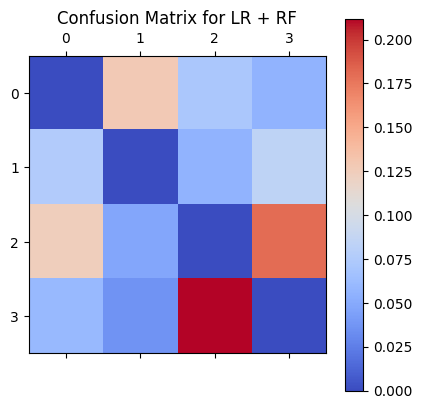

In [ ]:
from sklearn.metrics import confusion_matrix

CM_lr_rf = confusion_matrix(y_test, rf_model1_pred)

CM_lr_rf = CM_lr_rf.astype('float') / CM_lr_rf.sum(axis=1)[:, np.newaxis]

np.fill_diagonal(CM_lr_rf,0)
plt.figure(1, figsize = (18,18))
plt.matshow(CM_lr_rf, cmap=plt.cm.coolwarm)
plt.title('Confusion Matrix for LR + RF')
plt.tight_layout
plt.colorbar()
plt.show()
                          

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

In [ ]:
acc = accuracy_score(y_test, rf_model1_pred)
pre = precision_score(y_test, rf_model1_pred, average= 'macro')
rec = recall_score(y_test, rf_model1_pred, average='macro')
f1 = f1_score(y_test, rf_model1_pred, average= 'macro')

print(acc, pre, rec, f1)

0.717 0.7169623406746267 0.7170000000000001 0.7169675861442025


In [ ]:
rf_model1_proba = lr_rf_model_final.predict_proba(sel_x_test_final)

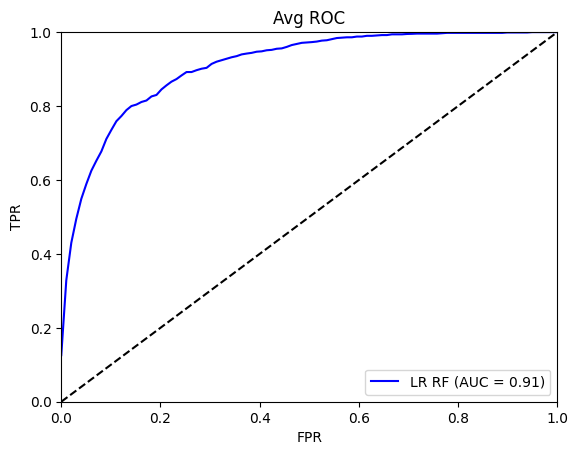

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, auc

Y_binary = label_binarize(y_test, classes=[0,1,2,3])

plt.figure()
plt.clf()
plt.plot([0,1], [0,1], 'k--')
plt.axis([0,1,0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Avg ROC')

Fpr_mean = np.linspace(0,1,100)


classifier = rf_model1_proba
labelval = 'LR RF'
color = 'b'


tpr_mean = []

for j in range(0, np.size(Y_binary, 1)):
  fpr, tpr, T = roc_curve(Y_binary[:,j], classifier[:,j])
  tpr_mean.append(np.interp(Fpr_mean, fpr, tpr))
Tpr_mean = np.mean(tpr_mean, axis=0)
mean_auc = auc(Fpr_mean, Tpr_mean)
plt.plot(Fpr_mean, Tpr_mean, color=color, label= r'%s (AUC = %0.2f)' % (labelval,mean_auc))

plt.legend()
plt.show()

Let's see how this model performs on the entire dataset, using class weights instead of cutting the dataset

In [ ]:
x_train1 = train_images.reshape(97477, -1)
y_train1 = train_labels.reshape(97477, -1)

x_test1 = test_images.reshape(1000, -1)
y_test1 = test_labels.reshape(1000, -1)

x_val1 = val_images.reshape(10832, -1)
y_val1 = val_labels.reshape(10832, -1)

In [ ]:
x_train1 = (255 - x_train1).astype(np.int64)
x_test1 = (255 - x_test1).astype(np.int64)
x_val1 = (255 - x_val1).astype(np.int64)


In [ ]:
x_train1 = x_train1 / 255.
x_test1 = x_test1 / 255.
x_val1 = x_val1 / 255.

The rest of the code was run in another notebook to save time.

In [ ]:
sel_x_train_final_weight = select_lr_final.fit_transform(x_train1, y_train1)
sel_x_test_final_weight = select_lr_final.transform(x_test1)

lr_rf_model_final_weight = RandomForestClassifier(
          criterion = 'entropy',
          max_depth = None,
          n_estimators = 1000,
          n_jobs = -1,
          random_state = 35,
          class_weight = 'balanced'
      )

In [ ]:
lr_rf_model_final_weight.fit(sel_x_train_final_weight, y_train1)
rf_model1_pred_weight = lr_rf_model_final_weight.predict(sel_x_test_final_weight)

Error of weighted data

In [ ]:
CM_lr_rf_weight = confusion_matrix(y_test1, rf_model1_pred_weight)

CM_lr_rf_weight = CM_lr_rf_weight.astype('float') / CM_lr_rf_weight.sum(axis=1)[:, np.newaxis]

np.fill_diagonal(CM_lr_rf_weight,0)
plt.figure(1, figsize = (18,18))
plt.matshow(CM_lr_rf_weight, cmap=plt.cm.coolwarm)
plt.title('Confusion Matrix for LR + RF: Weighted Data')
plt.tight_layout
plt.colorbar()
plt.show()
                          

Performance of weighted data

In [ ]:
acc1 = accuracy_score(y_test1, rf_model1_pred_weight)
pre1 = precision_score(y_test1, rf_model1_pred_weight, average= 'macro')
rec1 = recall_score(y_test1, rf_model1_pred_weight, average='macro')
f11 = f1_score(y_test1, rf_model1_pred_weight, average= 'macro')

print(acc1, pre1, rec1, f11)

In [ ]:
rf_model1_proba_weight = lr_rf_model_final_weight.predict_proba(sel_x_test_final_weight)

In [ ]:
Y_binary1 = label_binarize(y_test1, classes=[0,1,2,3])

plt.figure()
plt.clf()
plt.plot([0,1], [0,1], 'k--')
plt.axis([0,1,0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Avg ROC')

Fpr_mean = np.linspace(0,1,100)


classifier1 = rf_model1_proba_weight
labelval = 'LR RF'
color = 'b'


tpr_mean = []

for j in range(0, np.size(Y_binary1, 1)):
  fpr, tpr, T = roc_curve(Y_binary1[:,j], classifier1[:,j])
  tpr_mean.append(np.interp(Fpr_mean, fpr, tpr))
Tpr_mean = np.mean(tpr_mean, axis=0)
mean_auc = auc(Fpr_mean, Tpr_mean)
plt.plot(Fpr_mean, Tpr_mean, color=color, label= r'%s (AUC = %0.2f)' % (labelval,mean_auc))

plt.legend()
plt.show()

Ultimately, using the uniform dataset performs better than using the balanced parameter on the total training dataset.